In [255]:
# IMPORTS
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [256]:
# UTILITIES
def deriv2(f, dx):
    fprimeprime = (f[2:] - 2*f[1:-1] + f[0:-2])/dx**2
    return fprimeprime
def deriv1(f, dx):
    #fprime = (f[2:] - f[1:-1])/dx
    fprime = (f[2:] - f[0:-2])/(2*dx)
    return fprime
def deriv1v2(f,dx):
    fprime = (f[2:] - f[0:-2])/(2*dx)
    #starting from third element - all elements except first and last, why??
    return fprime

In [257]:
# SOL & INITIAL DATA
def solution(t, x):
    f = np.exp(-(t-x)**2) 
    return f

def initial_data(x):
    f = np.exp(-x**2)
    fprime = -1 * np.exp(-x**2)
    return np.array([f,fprime]) 

In [258]:
# CHANGE CONSTANTS
def rhs(t, f, a, b, mode):
    dt_u = np.zeros_like(f[0])
    sigmax = 0
    
    # CONSTANTS - 1
    if mode == 1:
        sigmax = 1
        dt_u[1:-1] = b * deriv1(f[1], dx) - (sigmax * f[0][1:-1])
        dt_v = np.zeros_like(f[1]) 
        dt_v[1:-1] = a * deriv1(f[0], dx) - (sigmax * f[1][1:-1])
        return np.array([dt_u, dt_v])

    # BUMP FUNCTION - 2
    if mode == 2: 
        aa = 10
        x0 = 0
        c = 2

        oneg = -1 * c
        opos = 1 * c
        outside = np.logical_or(x<= oneg, x>=opos)
        sigmax = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x: np.exp(aa * -1 * (1/((1-((x-x0)**2)/(c**2)))))])

    #GAUSSIAN FUNCTION - 3
    if mode == 3:
        aa = 1
        x0 = 2
        c = 0.1
        sigmax = aa * np.exp(-1*((x-x0)**2) / (2*(c)**2)) 

    dt_u[1:-1] = b * deriv1(f[1], dx) - (sigmax[1:-1] * f[0][1:-1])
    dt_v = np.zeros_like(f[1]) 
    dt_v[1:-1] = a * deriv1(f[0], dx) - (sigmax[1:-1] * f[1][1:-1])

    return np.array([dt_u, dt_v])

In [259]:
# BOUNDARY & RK
def dirichlet_boundary_condition(f):
    fout = f.copy()
    fout[0][0] = 0.
    fout[0][-1] = 0.
    fout[1][0] = 0.
    fout[1][-1] = 0.
    return fout

#periodic will just loop back around
def periodic_boundary_condition(f):
    fout = f.copy()
    fout[0][0] = f[0][-2]
    fout[0][-1] = f[0][1]
    fout[1][0] = f[1][-2]
    fout[1][-1] = f[1][1]
    return fout

def rk2step(f, rhs, t, dt):
    k1 = rhs(t, f, 1, 1, mode_option)
    f1 = f + 1./2.*dt*k1
    f1 = boundary_condition(f1)

    k2 = rhs(t + 1./2.*dt, f1, 1, 1, mode_option)
    f2 = f + dt * k2
    f2 = boundary_condition(f2)
    return f2

def rk4step(f, rhs, t, dt):
    k1 = rhs(t, f, 1, 1, mode_option)
    f2 = f + (dt*1/2*k1)
    f2 = boundary_condition(f2)
    k2 = rhs(t + 1./2.*dt, f2, 1, 1, mode_option)


    f3 = f + (dt*1/2*k2)
    f3 = boundary_condition(f3)
    k3 = rhs(t + 1./2.*dt, f3, 1, 1, mode_option)

    f4 = f + (dt*k3)
    f4 = boundary_condition(f4)
    k4 = rhs(t + dt, f4, 1, 1, mode_option)

    final = f + 1/6*(k1 + 2*k2 + 2*k3 + k4)*dt
    final = boundary_condition(final)
    return final

0.3000000000000007


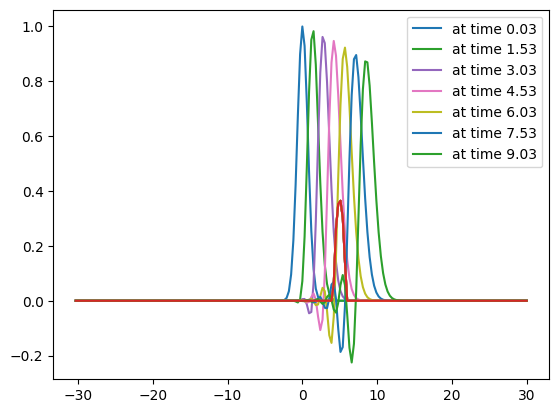

In [260]:
#MAIN
# 1 = constant, 2 = bump, 3 = gaussian
mode_option = 2
boundary_condition = dirichlet_boundary_condition

# start and end time
t0 = 0.
t1 = 10

# grid
xmin = -30
xmax = 30
ncells = 200
dx = (xmax - xmin) / ncells
nhalo = 1 

x = np.linspace(xmin - nhalo * dx, xmax, ncells + 2*nhalo)

oneg = -1 * c + x0
opos = 1 * c + x0
outside = np.logical_or(x<= oneg, x>=opos)
sigmax = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x: np.exp(aa * -1 * (1/((1-((x-x0)**2)/(c**2)))))])

# grid spacing
dx = x[1] - x[0]
print(dx)
# time step
dt = dx/10. 

t = t0
f = initial_data(x)
it = 0
while (t < t1):
    fnext = rk4step(f, rhs, t, dt)

    t += dt
    f = fnext
    
    if(it % 50 == 0):
        plt.plot(x, f[0], label="at time %g" % t)
        plt.plot(x, sigmax)
    it += 1

zero = 0
plt.legend(loc='best');